<a href="https://colab.research.google.com/github/2203A52043/Deep_Learning__/blob/main/2203A52043_DL_L8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Hyperparameters
eta = 0.1
gamma = 0.9
m = 1
c = -1
epochs = 100
epsilon = 1e-8
df = pd.read_excel("/content/Load Data in kW.xlsx")

print(df.columns)

Index([5551.82208], dtype='float64')


In [ ]:
y = df[df.columns[0]].values

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, 1))

y = (y - y.mean()) / y.std()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

v_m = 0
v_c = 0

# Training loop
for epoch in range(epochs):
    grad_m = -np.mean((y_train - (m * X_train.flatten() + c)) * X_train.flatten())
    grad_c = -np.mean(y_train - (m * X_train.flatten() + c))

    v_m = gamma * v_m + (1 - gamma) * grad_m**2
    v_c = gamma * v_c + (1 - gamma) * grad_c**2

    m -= (eta / (np.sqrt(v_m) + epsilon)) * grad_m
    c -= (eta / (np.sqrt(v_c) + epsilon)) * grad_c

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: m = {m}, c = {c}")


Epoch 0: m = 1.2677826751389283, c = 0.26199515486195746
Epoch 10: m = 1.0000426361781287, c = 6.824427731082599e-05
Epoch 20: m = 1.001691233050434, c = 0.0032750834705764084
Epoch 30: m = 1.017537185420111, c = 0.015304150267869868
Epoch 40: m = 1.0747666298082748, c = 0.08431998543607222
Epoch 50: m = 1.032742627512759, c = 0.03627508309273703
Epoch 60: m = 1.0424918981590403, c = 0.04082799970467592
Epoch 70: m = 1.0570056249102404, c = 0.055401858274767776
Epoch 80: m = 1.050926991662172, c = 0.05200546140637541
Epoch 90: m = 1.0474348899389982, c = 0.04773466107875546


In [ ]:

# Compute errors for train data
y_train_pred = m * X_train.flatten() + c
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Compute errors for test data
y_test_pred = m * X_test.flatten() + c
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Training Errors:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}")

print("Testing Errors:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}")

Training Errors:
MSE: 0.005378230634225423, RMSE: 0.07333642092593164, MAE: 0.05031418320934067
Testing Errors:
MSE: 0.002436038439903281, RMSE: 0.04935624013134794, MAE: 0.04925597986772705


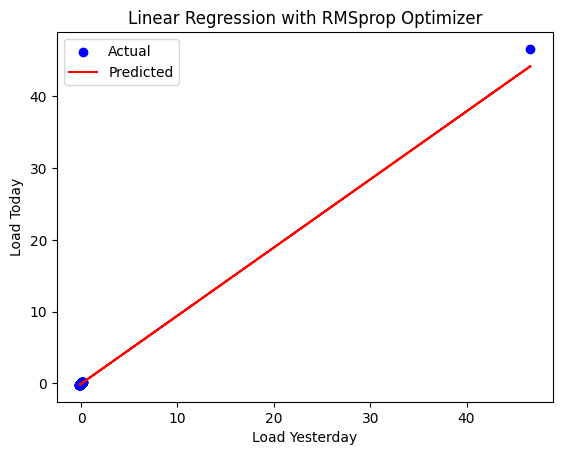

In [ ]:
# Plot results
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Predicted')
plt.xlabel("Load Yesterday")
plt.ylabel("Load Today")
plt.title("Linear Regression with RMSprop Optimizer")
plt.legend()
plt.show()